## <span style="color:blue">NYC Real Estate</span>

This project seeks to generate a predictive model to estimate the price of New York City residential real estate properties based on criteria such as the borough, geographic location, construction date, number of units and square footage. 
Data Source: https://www.kaggle.com/new-york-city/nyc-property-sales

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None
import statsmodels.api as sm
import numpy as np
pd.read_csv('nyc-rolling-sales.csv')


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


# Data Cleansing:

In [2]:
#Create dataframe
nyc = pd.read_csv('nyc-rolling-sales.csv')
#Replace borough names according to data source
nyc['BOROUGH'][nyc['BOROUGH'] == 1] = 'Manhattan'
nyc['BOROUGH'][nyc['BOROUGH'] == 2] = 'Bronx'
nyc['BOROUGH'][nyc['BOROUGH'] == 3] = 'Brooklyn'
nyc['BOROUGH'][nyc['BOROUGH'] == 4] = 'Queens'
nyc['BOROUGH'][nyc['BOROUGH'] == 5] = 'Staten Island'

In [3]:
#Check datatypes
print(nyc.dtypes)

Unnamed: 0                         int64
BOROUGH                           object
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object


In [4]:
#Drop extraneous columns
#Unnamed is a meaningless column
nyc.drop('Unnamed: 0', inplace=True, axis=1)
#Remove object type columns that are not useful information for this model:
#Neighborhood, Building Class Category, Tax Class at Present, Ease-ment, Building Class at Present, Address, 
#Apartment Number, Tax Class at Time of Sale, Building Class at Time of Sale
nyc.drop('NEIGHBORHOOD', inplace=True, axis=1)
nyc.drop('BUILDING CLASS CATEGORY', inplace=True, axis=1)
nyc.drop('TAX CLASS AT PRESENT', inplace=True, axis=1)
nyc.drop('EASE-MENT', inplace=True, axis=1)
nyc.drop('BUILDING CLASS AT PRESENT', inplace=True, axis=1)
nyc.drop('ADDRESS', inplace=True, axis=1)
nyc.drop('APARTMENT NUMBER', inplace=True, axis=1)
nyc.drop('TAX CLASS AT TIME OF SALE', inplace=True, axis=1)
nyc.drop('BUILDING CLASS AT TIME OF SALE', inplace=True, axis=1)
#Block, Lot are specific NYC database information that will not be useful for this model
nyc.drop('BLOCK', inplace=True, axis=1)
nyc.drop('LOT', inplace=True, axis=1)
#This model is concerned with residential real estate sales, so Commercial Units and Total Units are not needed
nyc.drop('COMMERCIAL UNITS', inplace=True, axis=1)
nyc.drop('TOTAL UNITS', inplace=True, axis=1)
#Land square feet is not relevant to all residential sales, so it is removed
nyc.drop('LAND SQUARE FEET', inplace=True, axis=1)

In [5]:
#Check datatypes
print(nyc.dtypes)

BOROUGH              object
ZIP CODE              int64
RESIDENTIAL UNITS     int64
GROSS SQUARE FEET    object
YEAR BUILT            int64
SALE PRICE           object
SALE DATE            object
dtype: object


In [6]:
#Correct datatypes
nyc['GROSS SQUARE FEET']= pd.to_numeric(nyc['GROSS SQUARE FEET'], errors='coerce')
nyc['SALE PRICE']= pd.to_numeric(nyc['SALE PRICE'], errors='coerce')
nyc['SALE DATE']= pd.to_datetime(nyc['SALE DATE'], errors='coerce')

In [7]:
#Check number of rows before removing 0 and nil values
print("There are " + str(len(nyc)) + " rows before removing 0 and nil values.")

There are 84548 rows before removing 0 and nil values.


In [8]:
#Remove rows with 0 values - rows with 0 in any remaining columns will not be relevant to model
nyc = nyc[(nyc != 0).all(1)]
#Check number of rows
print("There are " + str(len(nyc)) + " rows after removing 0 values.")

There are 45467 rows after removing 0 values.


In [9]:
#Remove rows with nil values - rows with nil in any remaining columns will not be relevant to model
nyc = nyc.dropna()
#Check number of rows
print("There are " + str(len(nyc)) + " rows after removing 0 and nil values.")

There are 28032 rows after removing 0 and nil values.


In [10]:
#Check datatypes
print(nyc.dtypes)

BOROUGH                      object
ZIP CODE                      int64
RESIDENTIAL UNITS             int64
GROSS SQUARE FEET           float64
YEAR BUILT                    int64
SALE PRICE                  float64
SALE DATE            datetime64[ns]
dtype: object


In [11]:
#Update float columns to integer
nyc['GROSS SQUARE FEET'] = nyc['GROSS SQUARE FEET'].astype(int)
nyc['SALE PRICE'] = nyc['SALE PRICE'].astype(int)
#Reindex and print dataset
nyc = nyc.reset_index(drop=True)
print(nyc)
#Print dataset stats
print(nyc.describe())
print(nyc.info())

             BOROUGH  ZIP CODE  RESIDENTIAL UNITS  GROSS SQUARE FEET  \
0          Manhattan     10009                  5               6440   
1          Manhattan     10009                 10               6794   
2          Manhattan     10009                  6               4615   
3          Manhattan     10009                  8               4226   
4          Manhattan     10009                 24              18523   
...              ...       ...                ...                ...   
28027  Staten Island     10309                  2               1300   
28028  Staten Island     10309                  2               2160   
28029  Staten Island     10309                  2               2575   
28030  Staten Island     10309                  2               2377   
28031  Staten Island     10309                  2               1496   

       YEAR BUILT  SALE PRICE  SALE DATE  
0            1900     6625000 2017-07-19  
1            1913     3936272 2016-09-23  
2     

First I'll analyze the sale price data, which is what the model will predit. I'll determine the range of data to include in the model.

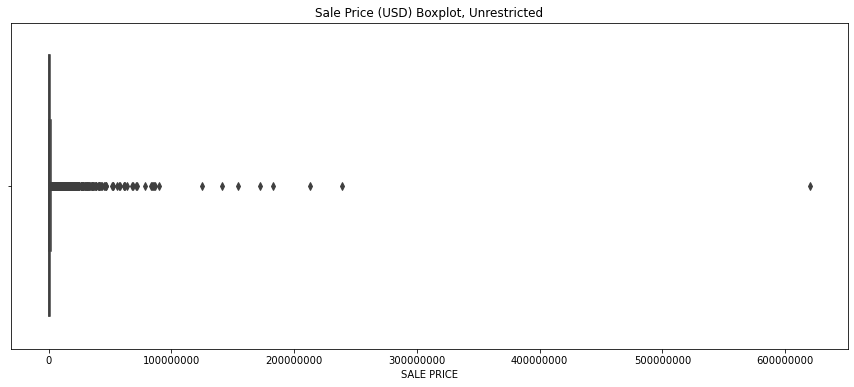

In [12]:
## Generate boxplot for sale price
plt.figure(figsize=(15,6))
sns.boxplot(x='SALE PRICE', data=nyc)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Sale Price (USD) Boxplot, Unrestricted')
plt.show()

From the chart above it is clear that there is a concentration of values at the low end 
and outliers at the higher end. The lowest sale prices may represent gifts rather than valid sales, and the highest sale prices would not be relevant to the model. Let's see how the dataset changes when we restrict the sale price range to 100,000 - 10,000,000. This includes approximately 94% of the remaining dataset.

There are 26389 rows after restricting the sale price range.


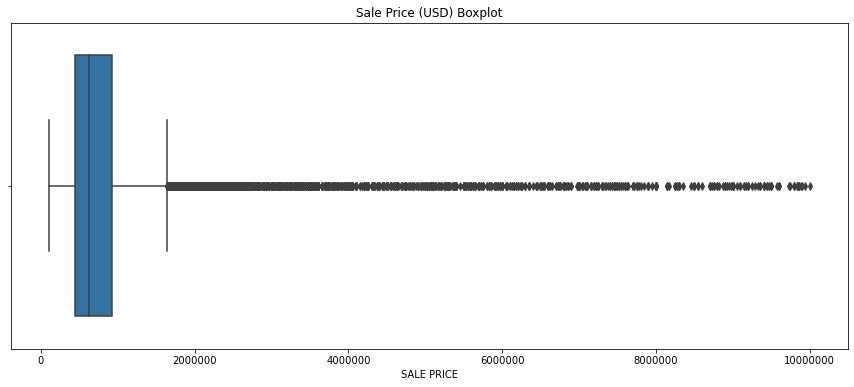

In [13]:
#Restrict range, count remaining rows and generate boxplot
nyc = nyc[(nyc['SALE PRICE'] > 100000) & (nyc['SALE PRICE'] < 10000000)]
print("There are " + str(len(nyc)) + " rows after restricting the sale price range.")
plt.figure(figsize=(15,6))
sns.boxplot(x='SALE PRICE', data=nyc)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Sale Price (USD) Boxplot')
plt.show()

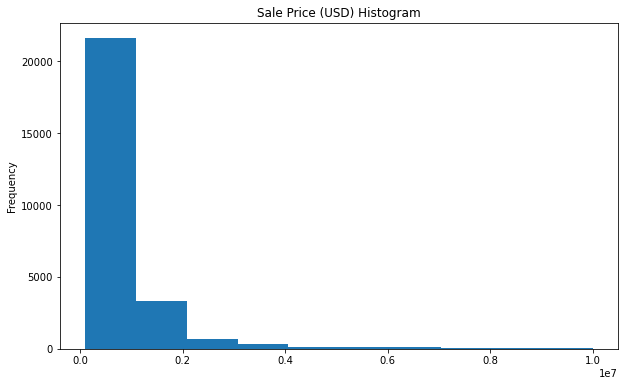

In [14]:
#Create histogram for sales price
plt.figure(figsize=(10,6))
plt.hist(nyc['SALE PRICE'])
plt.title('Sale Price (USD) Histogram')
plt.ylabel('Frequency')
plt.show()

Next I'll check and update the ranges for Residential Units and Gross Square Feet.

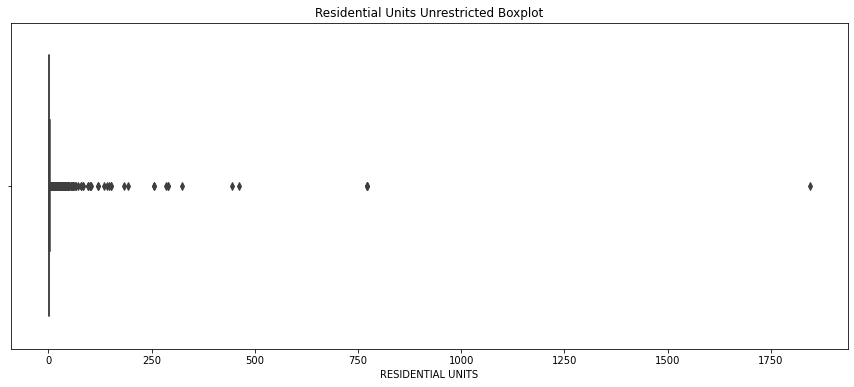

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(x='RESIDENTIAL UNITS', data=nyc)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Residential Units Unrestricted Boxplot')
plt.show()

I'll restrict the upper range for Residential Units to 100 to eliminate the highest outliers while retaining 94% of the remaining dataset.

There are 26365 rows after restricting the residential units range.


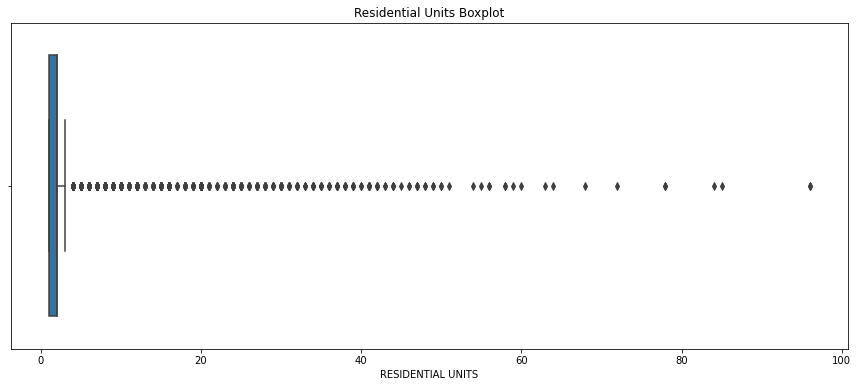

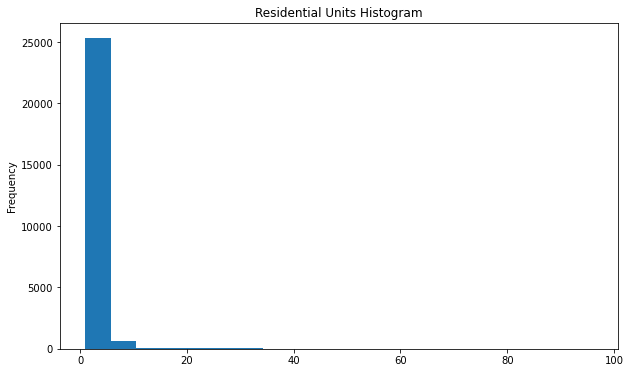

In [16]:
#Restrict Residential Units range, count remaining rows and generate boxplot and histrogram
nyc = nyc[(nyc['RESIDENTIAL UNITS'] < 100)]
print("There are " + str(len(nyc)) + " rows after restricting the residential units range.")
plt.figure(figsize=(15,6))
sns.boxplot(x='RESIDENTIAL UNITS', data=nyc)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Residential Units Boxplot')
plt.show()
plt.figure(figsize=(10,6))
plt.hist(nyc['RESIDENTIAL UNITS'], bins = 20)
plt.title('Residential Units Histogram')
plt.ylabel('Frequency')
plt.show()

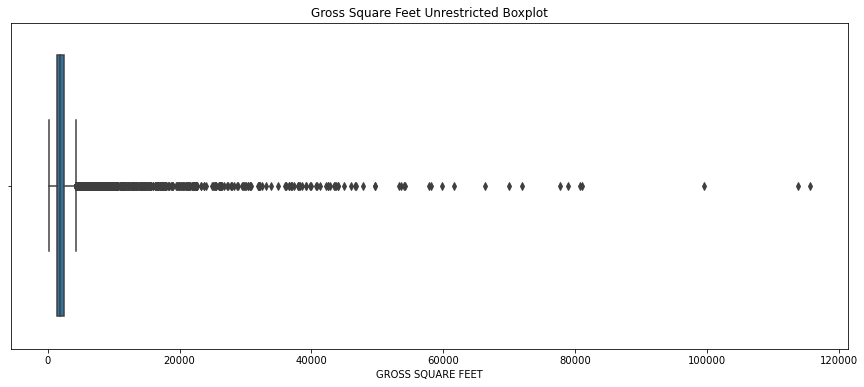

In [17]:
plt.figure(figsize=(15,6))
sns.boxplot(x='GROSS SQUARE FEET', data=nyc)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Gross Square Feet Unrestricted Boxplot')
plt.show()

I'll restrict the upper range for Gross Square Feet to 50,000 to remove the highest outliers while retaining 99.9% of the remaining dataset.

There are 26347 rows after restricting the gross square feet range.


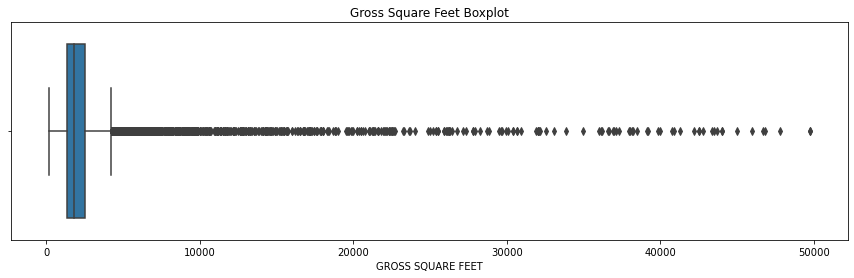

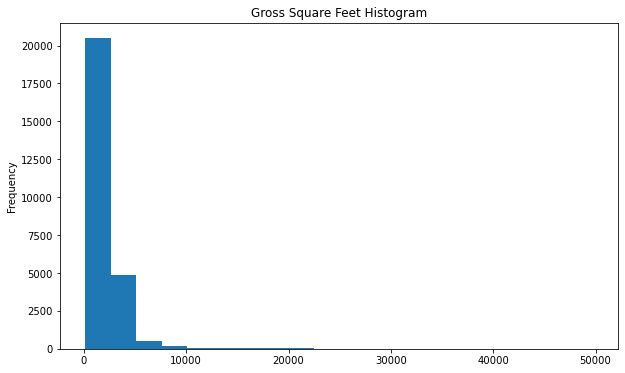

In [18]:
#Restrict Residential Units range, count remaining rows and generate boxplot and histrogram
nyc = nyc[(nyc['GROSS SQUARE FEET'] < 50000)]
print("There are " + str(len(nyc)) + " rows after restricting the gross square feet range.")
plt.figure(figsize=(15,4))
sns.boxplot(x='GROSS SQUARE FEET', data=nyc)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Gross Square Feet Boxplot')
plt.show()
plt.figure(figsize=(10,6))
plt.hist(nyc['GROSS SQUARE FEET'], bins = 20)
plt.title('Gross Square Feet Histogram')
plt.ylabel('Frequency')
plt.show()

In order to analyze the data by geographic area, I will use the zip codes to designate geographic areas that are assigned by NE, NW, SE and SW for each NYC borough. This requires importing a separate file I have created with zip codes and geographic areas. This file was created by analyzing longitude and latitude data for zip codes from https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/

In [19]:
pd.read_csv('nyczipcodes.csv')

,ZIP CODE,AREA
0,10453,BRONX NW
1,10457,BRONX SW
2,10460,BRONX SW
3,10458,BRONX NW
4,10467,BRONX NE
...,...,...
178,11249,BROOKLYN NW
179,11001,QUEENS NE
180,11040,QUEENS NE
181,10803,BRONX NE


In [20]:
zip = pd.read_csv('nyczipcodes.csv')
nyc = nyc.merge(zip, how='left', on='ZIP CODE')
nyc.set_index
nyc.index.name = 'Index'
print(nyc)
print(nyc.info())

             BOROUGH  ZIP CODE  RESIDENTIAL UNITS  GROSS SQUARE FEET  \
Index                                                                  
0          Manhattan     10009                  5               6440   
1          Manhattan     10009                 10               6794   
2          Manhattan     10009                  6               4615   
3          Manhattan     10009                  8               4226   
4          Manhattan     10009                  3               3360   
...              ...       ...                ...                ...   
26342  Staten Island     10309                  2               1300   
26343  Staten Island     10309                  2               2160   
26344  Staten Island     10309                  2               2575   
26345  Staten Island     10309                  2               2377   
26346  Staten Island     10309                  2               1496   

       YEAR BUILT  SALE PRICE  SALE DATE              AREA  
In

Next I'll add one-hot encoding for the borough and area columns to prepare the dataset for linear regression.

In [21]:
borough = pd.get_dummies(nyc.BOROUGH, prefix='Borough')
borough.set_index
borough.index.name = 'Index'
area = pd.get_dummies(nyc.AREA, prefix='Area')
area.set_index
area.index.name = 'Index'
print(borough.index.name)
nyc = nyc.merge(borough, on = 'Index')
nyc = nyc.merge(area, on = 'Index')
print(nyc)

Index
             BOROUGH  ZIP CODE  RESIDENTIAL UNITS  GROSS SQUARE FEET  \
Index                                                                  
0          Manhattan     10009                  5               6440   
1          Manhattan     10009                 10               6794   
2          Manhattan     10009                  6               4615   
3          Manhattan     10009                  8               4226   
4          Manhattan     10009                  3               3360   
...              ...       ...                ...                ...   
26342  Staten Island     10309                  2               1300   
26343  Staten Island     10309                  2               2160   
26344  Staten Island     10309                  2               2575   
26345  Staten Island     10309                  2               2377   
26346  Staten Island     10309                  2               1496   

       YEAR BUILT  SALE PRICE  SALE DATE              ARE

In [22]:
nyc.to_csv(r'/Users/Nicholas/nyc-rolling-sales-updated.csv')
#Show info for cleaned dataset.
print(nyc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26347 entries, 0 to 26346
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   BOROUGH                26347 non-null  object        
 1   ZIP CODE               26347 non-null  int64         
 2   RESIDENTIAL UNITS      26347 non-null  int64         
 3   GROSS SQUARE FEET      26347 non-null  int64         
 4   YEAR BUILT             26347 non-null  int64         
 5   SALE PRICE             26347 non-null  int64         
 6   SALE DATE              26347 non-null  datetime64[ns]
 7   AREA                   26347 non-null  object        
 8   Borough_Bronx          26347 non-null  uint8         
 9   Borough_Brooklyn       26347 non-null  uint8         
 10  Borough_Manhattan      26347 non-null  uint8         
 11  Borough_Queens         26347 non-null  uint8         
 12  Borough_Staten Island  26347 non-null  uint8         
 13  A

# Creating Predictive Model:

First I'll create a heatmap using all numerical categories except for Zip Code and Sale Date.

Text(0.5, 1.0, 'Heat Map')

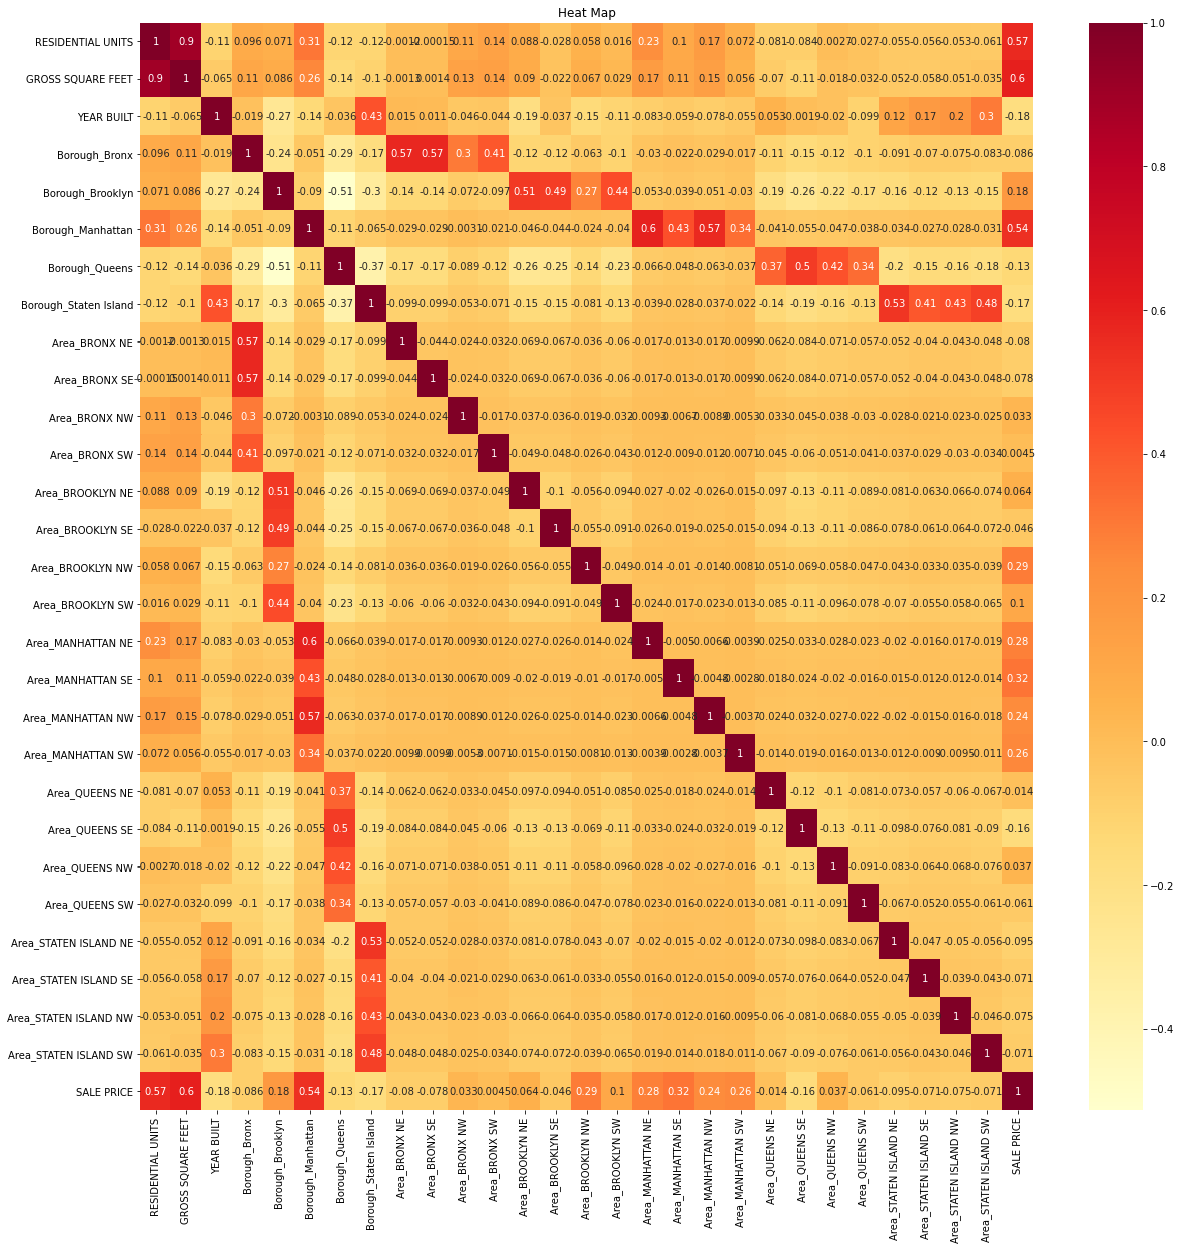

In [23]:
filt = ['RESIDENTIAL UNITS', 'GROSS SQUARE FEET', 'YEAR BUILT',
        'Borough_Bronx', 'Borough_Brooklyn', 'Borough_Manhattan', 'Borough_Queens', 'Borough_Staten Island', 
        'Area_BRONX NE', 'Area_BRONX SE', 'Area_BRONX NW', 'Area_BRONX SW',
        'Area_BROOKLYN NE', 'Area_BROOKLYN SE', 'Area_BROOKLYN NW', 'Area_BROOKLYN SW',
        'Area_MANHATTAN NE', 'Area_MANHATTAN SE', 'Area_MANHATTAN NW', 'Area_MANHATTAN SW',
        'Area_QUEENS NE', 'Area_QUEENS SE', 'Area_QUEENS NW', 'Area_QUEENS SW',
        'Area_STATEN ISLAND NE', 'Area_STATEN ISLAND SE', 'Area_STATEN ISLAND NW', 'Area_STATEN ISLAND SW',
        'SALE PRICE']

nyccorr = nyc[filt].corr()
plt.figure(figsize=(20,20))
nycheatmap = sns.heatmap(nyccorr, cmap='YlOrRd', annot=True)
plt.title("Heat Map")

Next I'll compare the correlations of all of the variables with Sale Price.

Text(0.5, 1.0, 'Correlated Features')

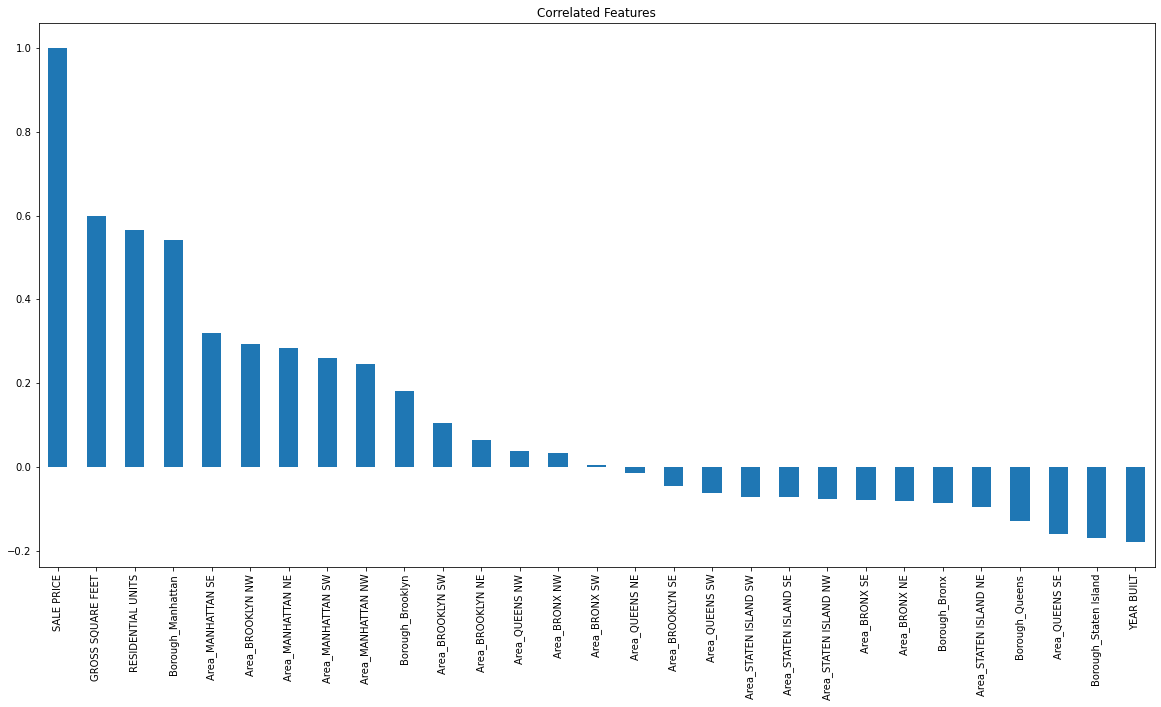

In [24]:
plt.figure(figsize=(20,10))
colList_corr = nyccorr.columns
nyccorr=nyccorr.sort_values('SALE PRICE', ascending=False)
nyccorr['SALE PRICE'].plot(kind='bar')
plt.xticks(rotation=90)
plt.title("Correlated Features")

While it's interesting to see how the boroughs compare with the specific areas in correlating with sale price, it would be double counting to include both boroughs and areas in the model.
So the regression model will exclude the boroughs data as well as year built which has an insignifiant negative correlation.

In [25]:
filt2 = ['RESIDENTIAL UNITS', 'GROSS SQUARE FEET',
        'Area_BRONX NE', 'Area_BRONX SE', 'Area_BRONX NW', 'Area_BRONX SW',
        'Area_BROOKLYN NE', 'Area_BROOKLYN SE', 'Area_BROOKLYN NW', 'Area_BROOKLYN SW',
        'Area_MANHATTAN NE', 'Area_MANHATTAN SE', 'Area_MANHATTAN NW', 'Area_MANHATTAN SW',
        'Area_QUEENS NE', 'Area_QUEENS SE', 'Area_QUEENS NW', 'Area_QUEENS SW',
        'Area_STATEN ISLAND NE', 'Area_STATEN ISLAND SE', 'Area_STATEN ISLAND NW', 'Area_STATEN ISLAND SW']
X = nyc[filt2]
y = nyc['SALE PRICE']

OLSmodel = sm.OLS(y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE PRICE   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     2416.
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:54:09   Log-Likelihood:            -3.8612e+05
No. Observations:               26347   AIC:                         7.723e+05
Df Residuals:                   26325   BIC:                         7.725e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
RESIDENTIAL UNITS       290.2962   2695.820      0.108      0.914   -4993.657    5574.250
GROSS SQUARE FEET       178.7786      3.171     56.372      0.000     172.563     184.995
Area_BRONX NE          9.371e+04   1.71e+04      5.467      0.000    6.01e+04    1.27e+05
Area_BRONX SE          9.807e+04   1.72e+04      5.717      0.000    6.44e+04    1.32e+05
Area_BRONX NW          2.131e+05    3.2e+04      6.661      0.000     1.5e+05    2.76e+05
Area_BRONX SW          5.866e+04   2.43e+04      2.417      0.016    1.11e+04    1.06e+05
Area_BROOKLYN NE       5.215e+05    1.2e+04     43.565      0.000    4.98e+05    5.45e+05
Area_BROOKLYN SE       3.486e+05   1.19e+04     29.322      0.000    3.25e+05    3.72e+05
Area_BROOKLYN NW       1.914e+06   2.09e+04     91.542      0.000    1.87e+06    1.96e+06
Area_BROOKLYN SW       7.612e+05   1.32e+04     57.757      0.000    7.35e+05    7.87e+05
Area_MANHATTAN NE      2.814e+06   4.38e+04     64.188      0.000    2.73e+06     2.9e+06
Area_MANHATTAN SE      4.745e+06   5.84e+04     81.279      0.000    4.63e+06    4.86e+06
Area_MANHATTAN NW      2.554e+06   4.51e+04     56.569      0.000    2.47e+06    2.64e+06
Area_MANHATTAN SW       5.24e+06   7.41e+04     70.710      0.000    5.09e+06    5.38e+06
Area_QUEENS NE         5.173e+05   1.25e+04     41.497      0.000    4.93e+05    5.42e+05
Area_QUEENS SE         1.915e+05   9667.608     19.812      0.000    1.73e+05     2.1e+05
Area_QUEENS NW         5.884e+05   1.13e+04     52.004      0.000    5.66e+05    6.11e+05
Area_QUEENS SW         2.941e+05   1.35e+04     21.760      0.000    2.68e+05    3.21e+05
Area_STATEN ISLAND NE  1.847e+05   1.47e+04     12.568      0.000    1.56e+05    2.13e+05
Area_STATEN ISLAND SE  2.366e+05   1.85e+04     12.757      0.000       2e+05    2.73e+05
Area_STATEN ISLAND NW  2.131e+05   1.76e+04     12.116      0.000    1.79e+05    2.48e+05
Area_STATEN ISLAND SW  2.279e+05    1.6e+04     14.210      0.000    1.96e+05    2.59e+05
==============================================================================
Omnibus:                    10367.037   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1715294.763
Skew:                           0.802   Prob(JB):                         0.00
Kurtosis:                      42.496   Cond. No.                     7.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""